# 538 Day 27: Trigonometric interpolation and spectral differentiation

In [8]:
from numpy import *
from matplotlib import rcdefaults
rcdefaults()  # restore default matplotlib rc parameters
%config InlineBackend.figure_format='retina'   
import seaborn as sns  # wrapper for matplotlib that provides prettier styles and more
import matplotlib.pyplot as plt  # use matplotlib functionality directly
%matplotlib inline  
sns.set()
def cprint(z,n=5): # round doesn't work on complex type
    re = np.round(np.real(z),n)
    im = np.round(np.imag(z),n)
    return re + 1j*im


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }

<IPython.core.display.Javascript object>

## Trigonometric interpolation of some non-trig functions

0 (7.07107+0j)
1 0j
2 (-1.41421+1.41421j)
3 0j
4 (-1.41421+0j)
5 0j
6 (-1.41421-1.41421j)
7 0j



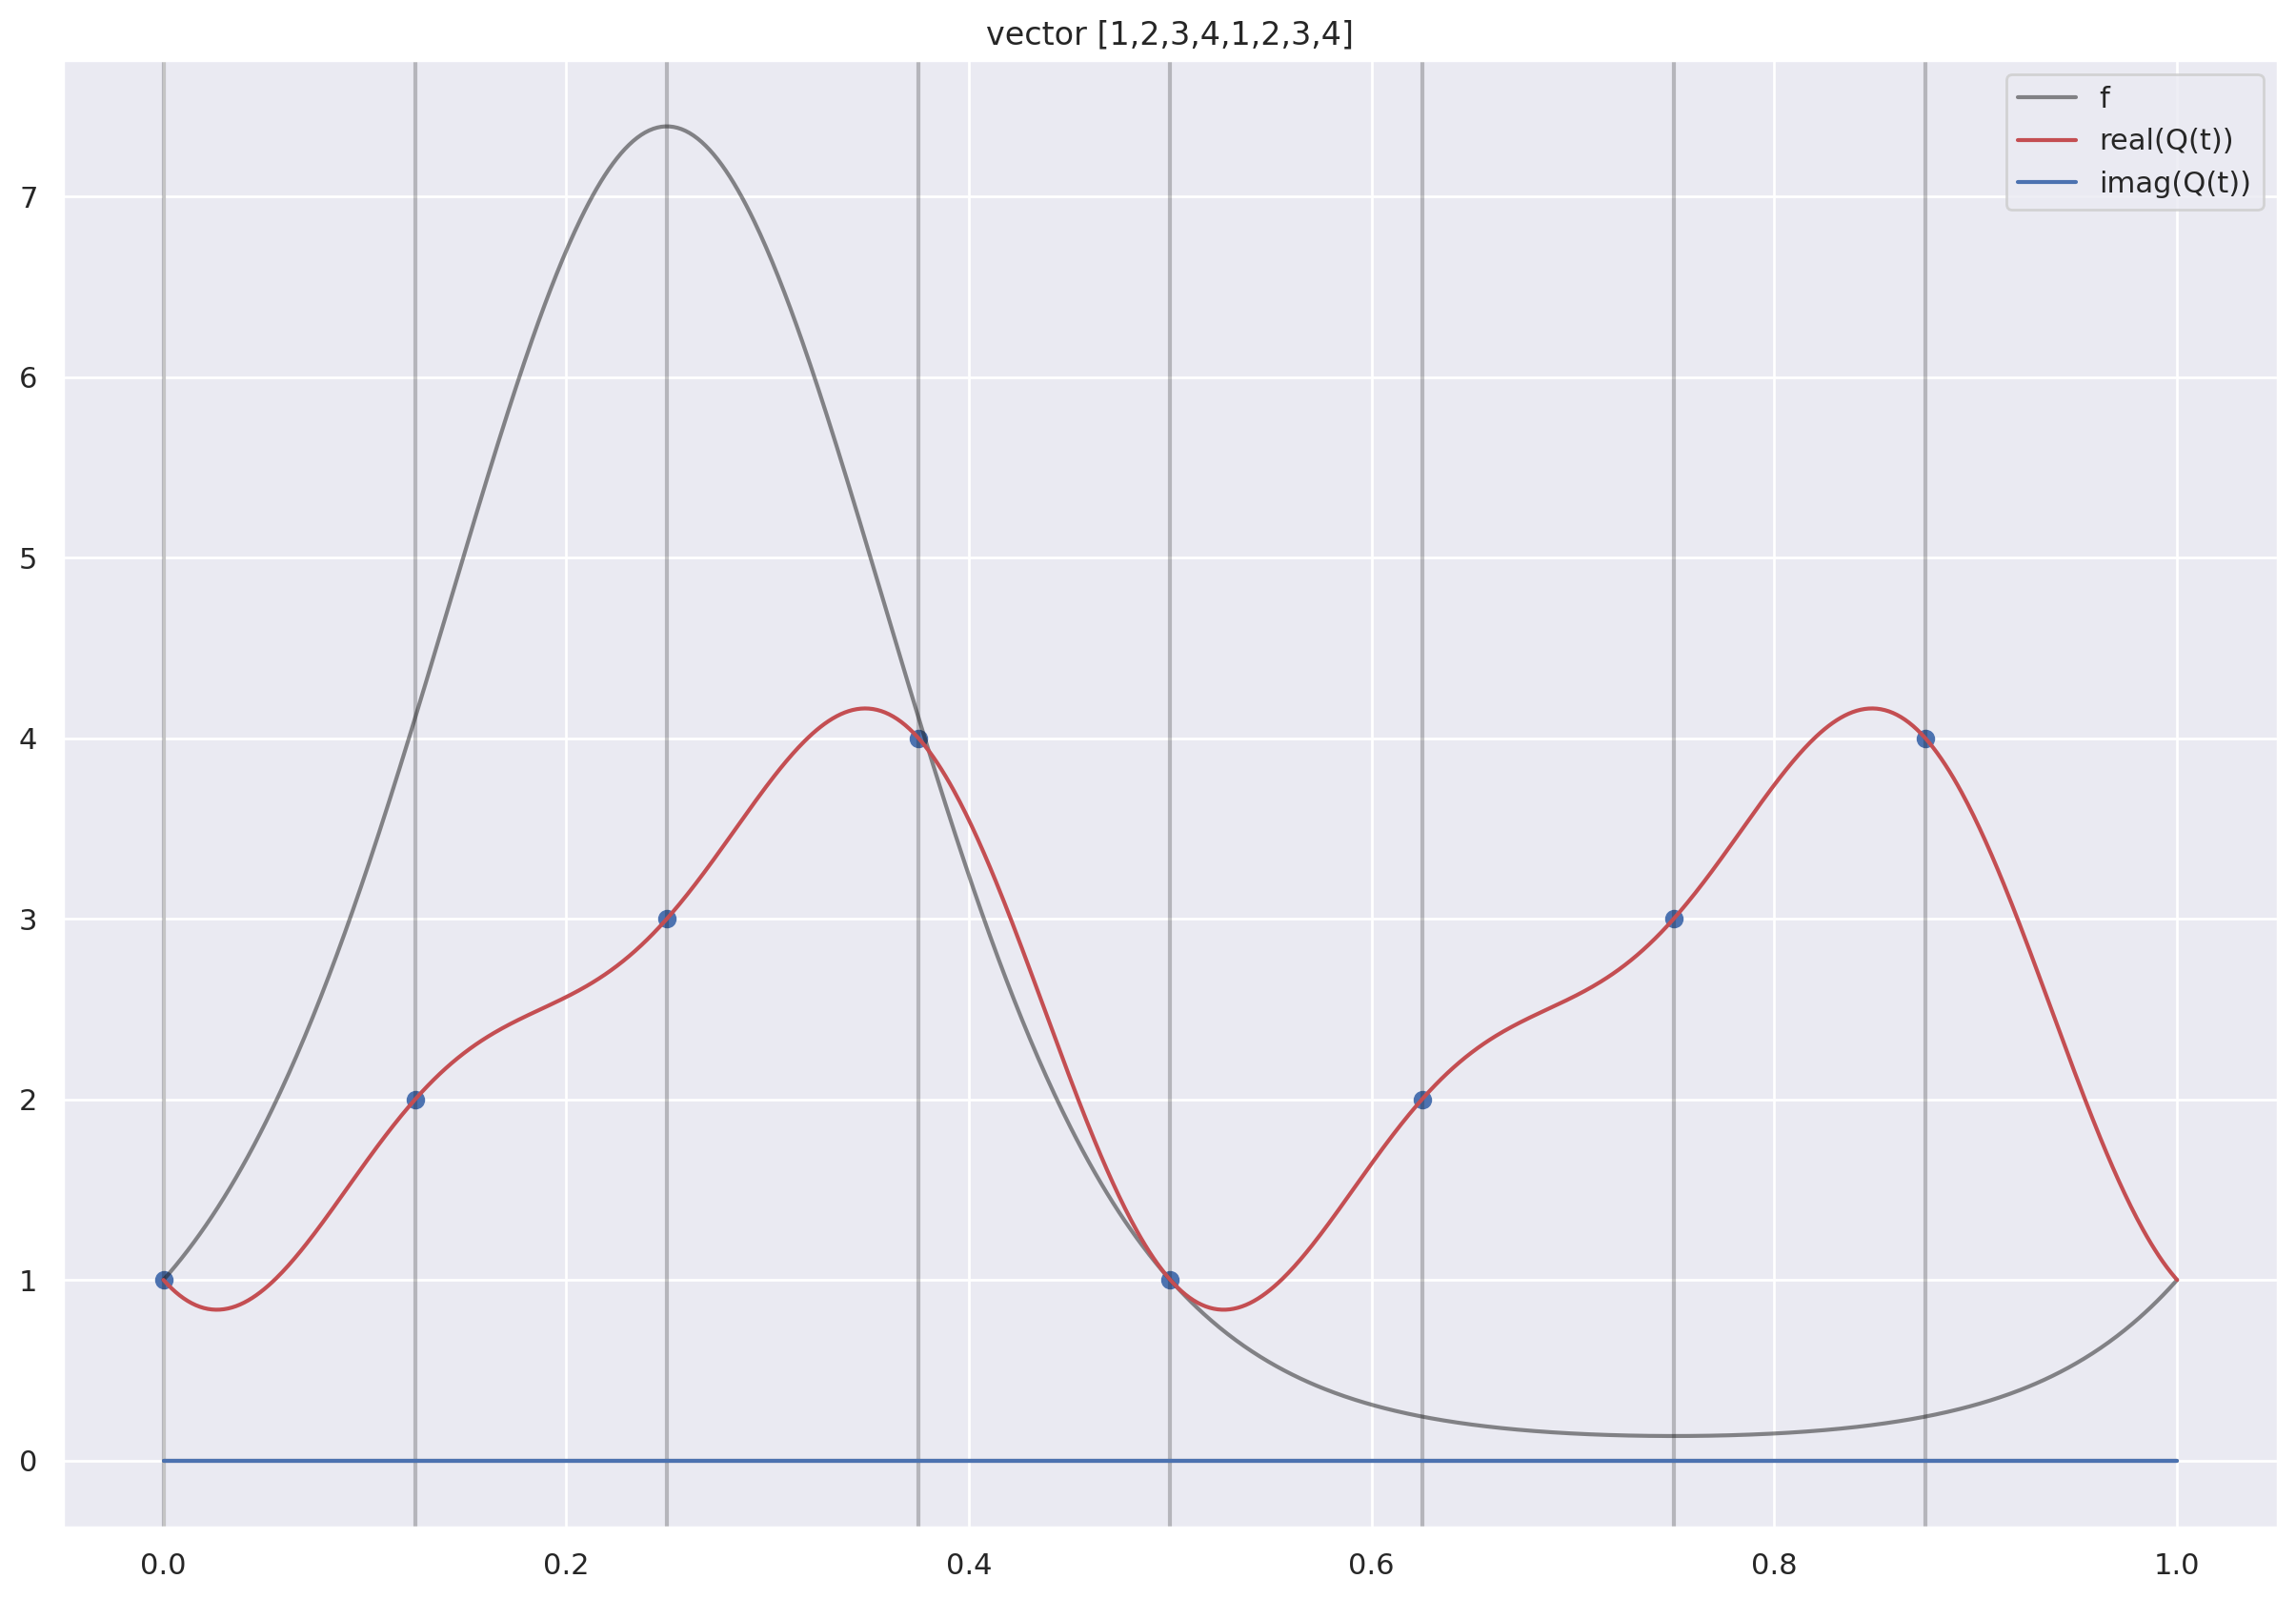

In [21]:
#triginterp.py
import numpy as np
from scipy.fftpack import fft,ifft
from pylab import plot,ion,ioff,draw,title,figure,axvline,legend
np.set_printoptions(linewidth=300)

formula = 'R'

for example in [6]:

        figure(example,figsize=(15,10))
        if example==1:
                mytitle = 'vector [1,0,-1,0]'
                c = 0.
                d = 1.
                L = d-c
                x = np.array([1.,0.,-1.,0.])+0.5
                n = len(x)
                t = L*np.arange(n)/float(n)
        elif example==2:
                mytitle = 'distorted sine'
                n = 8
                c = 0.
                d = 1.
                L = d-c
                t = np.linspace(0.,L,n,endpoint=False)
                #print( len(t) )
                r = 2
                def myf(t): return np.exp(r*np.sin(2*pi*t/L))#sin(2*pi*t/L)#
                x = myf(t)
        elif example==3:
                mytitle = 'Runge function'
                n = 12#8
                c = -1.
                d =  1.
                L = d-c
                t = np.linspace(c,d,n,endpoint=False)
                #print( len(t) )
                def myf(t): return 1/(1+12.*t*t)
                x = myf(t)

        elif example==4:
                mytitle = 'odd sine'
                n = 8
                c = -1.
                d =  1.
                L = d-c
                t = linspace(c,d,n,endpoint=False)
                print( len(t) )
                def myf(t): return np.sin(3*pi*(t-c)/L)
                x = myf(t)

        elif example==5:
                mytitle = 'vector [0,1,2,3,4,5,6,7,8,9]'
                c = 0.
                d = 1.
                L = d-c
                x = np.array([0,1,2,3,4,5,6,7,8,9],dtype=float)
                n = len(x)
                t = L*np.arange(n)/float(n)

        elif example==6:
                mytitle = 'vector [1,2,3,4,1,2,3,4]'
                c = 0.
                d = 1.
                L = d-c
                x = np.array([1,2,3,4,1,2,3,4],dtype=float)
                n = len(x)
                t = L*np.arange(n)/float(n)

        else:
                print("Which example do you want me to do?")

        plot( t, x, 'o')
        for tj in t: axvline(tj,color='k',alpha=0.25)

        y = fft(x)/np.sqrt(n) # division to get Sauer normalization of DFT
        for i,item in enumerate(y):
            print(i,cprint(item))

        tt = np.linspace(c,d,1000)
        #plot(tt,myf(tt),'k')
        plot([c,d],[0,0],'k',alpha=0.5)

        p = np.zeros_like(tt,dtype=complex)
        
        assert n%2==0
        kvals = range(-n//2+1,n//2)
            
        #z = y.copy()
        for k in kvals:  
            term = y[k%n]/np.sqrt(n) * np.exp(1j*2.*np.pi*k*(tt-c)/L)
            p += term
            
        # deal with Nyquist frequency
        for k in [-n//2,n//2]:
            term = y[k%n]/np.sqrt(n) * np.exp(1j*2.*np.pi*k*(tt-c)/L)
            p += term/2

        plot(tt,myf(tt)   ,'k',label='f',alpha=0.5)
        plot(tt,np.real(p),'r',label='real(Q(t))')
        plot(tt,np.imag(p),'b',label='imag(Q(t))')
        legend()
        title(mytitle)
        print()

## Spectral differentiation

In [22]:
#triginterp.py
import numpy as np
from scipy.fftpack import fft,ifft
from pylab import plot,ion,ioff,draw,title,figure,axvline,legend

for example in [6]:

        #figure(example,figsize=(15,10))
        fig, axes = plt.subplots(2,1,figsize=(15,10))
        
        if example==1:
                mytitle = 'vector [1,0,-1,0]'
                c = 0.
                d = 1.
                L = d-c
                x = np.array([1.,0.,-1.,0.])+0.5
                n = len(x)
                t = L*np.arange(n)/float(n)
        elif example==2:
                mytitle = 'distorted sine'
                n = 12#8
                c = 0.
                d = 1.
                L = d-c
                t = np.linspace(0.,L,n,endpoint=False)
                print( len(t) )
                r = 3
                def myf(t): return np.exp(r*np.sin(2*pi*t/L))
                def myfprime(t): return exp(r*sin(2*pi*t/L))*r*cos(2*pi*t/L)*(2*pi/L)
                x = myf(t)
                xp = myfprime(t)
        elif example==3:
                mytitle = 'Runge function'
                n = 8
                c = -1.
                d =  1.
                L = d-c
                t = np.linspace(c,d,n,endpoint=False)
                #print( len(t) )
                def myf(t): return 1/(1+12.*t*t)
                def myfprime(t): return -myf(t)**2 * 24*t
                x = myf(t)
                xp = myfprime(t)

        elif example==4:
                mytitle = 'odd sine'
                n = 8
                c = -1.
                d =  1.
                L = d-c
                t = linspace(c,d,n,endpoint=False)
                #print( len(t) )
                def myf(t): return np.sin(3*pi*(t-c)/L)
                x = myf(t)

        elif example==5:
                mytitle = 'vector [0,1,2,3,4,5,6,7,8,9]'
                c = 0.
                d = 1.
                L = d-c
                x = np.array([0,1,2,3,4,5,6,7,8,9],dtype=float)
                n = len(x)
                t = L*np.arange(n)/float(n)

        elif example==6:
                mytitle = 'vector [1,2,3,4,1,2,3,4]'
                c = 0.
                d = 1.
                L = d-c
                x = np.array([1,2,3,4,1,2,3,4],dtype=float)
                n = len(x)
                t = L*np.arange(n)/float(n)

        else:
                print("Which example do you want me to do?")


        y = fft(x)/sqrt(n) # division to get Sauer def of DFT
        a = real(y)
        b = imag(y)
        #print( 'y',y )
        #print( 'a',a )
        #print( 'b',b )

        tt = np.linspace(c,d,1000)

        p      = np.zeros_like(tt,dtype=complex)  # for interpolant p to f
        pprime = np.zeros_like(tt,dtype=complex)  # for p'

        assert n%2==0
        kvals = range(-n//2+1,n//2)
            
        #z = y.copy()
        ################ FORM THE SPECTRAL DERIVATIVE HERE
        for k in kvals:  
            term = ?????????????????????????????????????
            p += term
            
        
        ################ FINISH THE SPECTRAL DERIVATIVE HERE 
        for k in [-n//2,n//2]:
            term = ????????????????????????????????????
            p += term/2
            

        ax = axes[0]
        ax.plot([c,d],[0,0],'k',alpha=0.5)
        for tj in t: ax.axvline(tj,color='k',alpha=0.25)
        ax.plot( t, x, 'o')
        ax.plot(tt,myf(tt)   ,'k',label='f',alpha=0.5)
        ax.plot(tt,np.real(p),'r',label='real(Q(t))')
        ax.plot(tt,np.imag(p),'b',label='imag(Q(t))')
        ax.legend()
        ax.set_title(mytitle)

        ax = axes[1]
        for tj in t: ax.axvline(tj,color='k',alpha=0.25)
        ax.plot([c,d],[0,0],'k',alpha=0.5)
        ax.plot(tt,myfprime(tt)   ,'c',label="f'",alpha=0.5)
        ################ PLOT THE SPECTRAL DERIVATIVE HERE ######
        ax.legend()
        ax.set_title(mytitle)

SyntaxError: invalid syntax (2941263760.py, line 96)

y [ 7.07107+0.j       0.     +0.j      -1.41421+1.41421j  0.     +0.j      -1.41421+0.j       0.     +0.j      -1.41421-1.41421j  0.     +0.j     ]
a [ 7.07107  0.      -1.41421  0.      -1.41421  0.      -1.41421  0.     ]
b [-0.       0.       1.41421  0.       0.      -0.      -1.41421 -0.     ]
L1 error in spectral derivative:  36.92673319963571


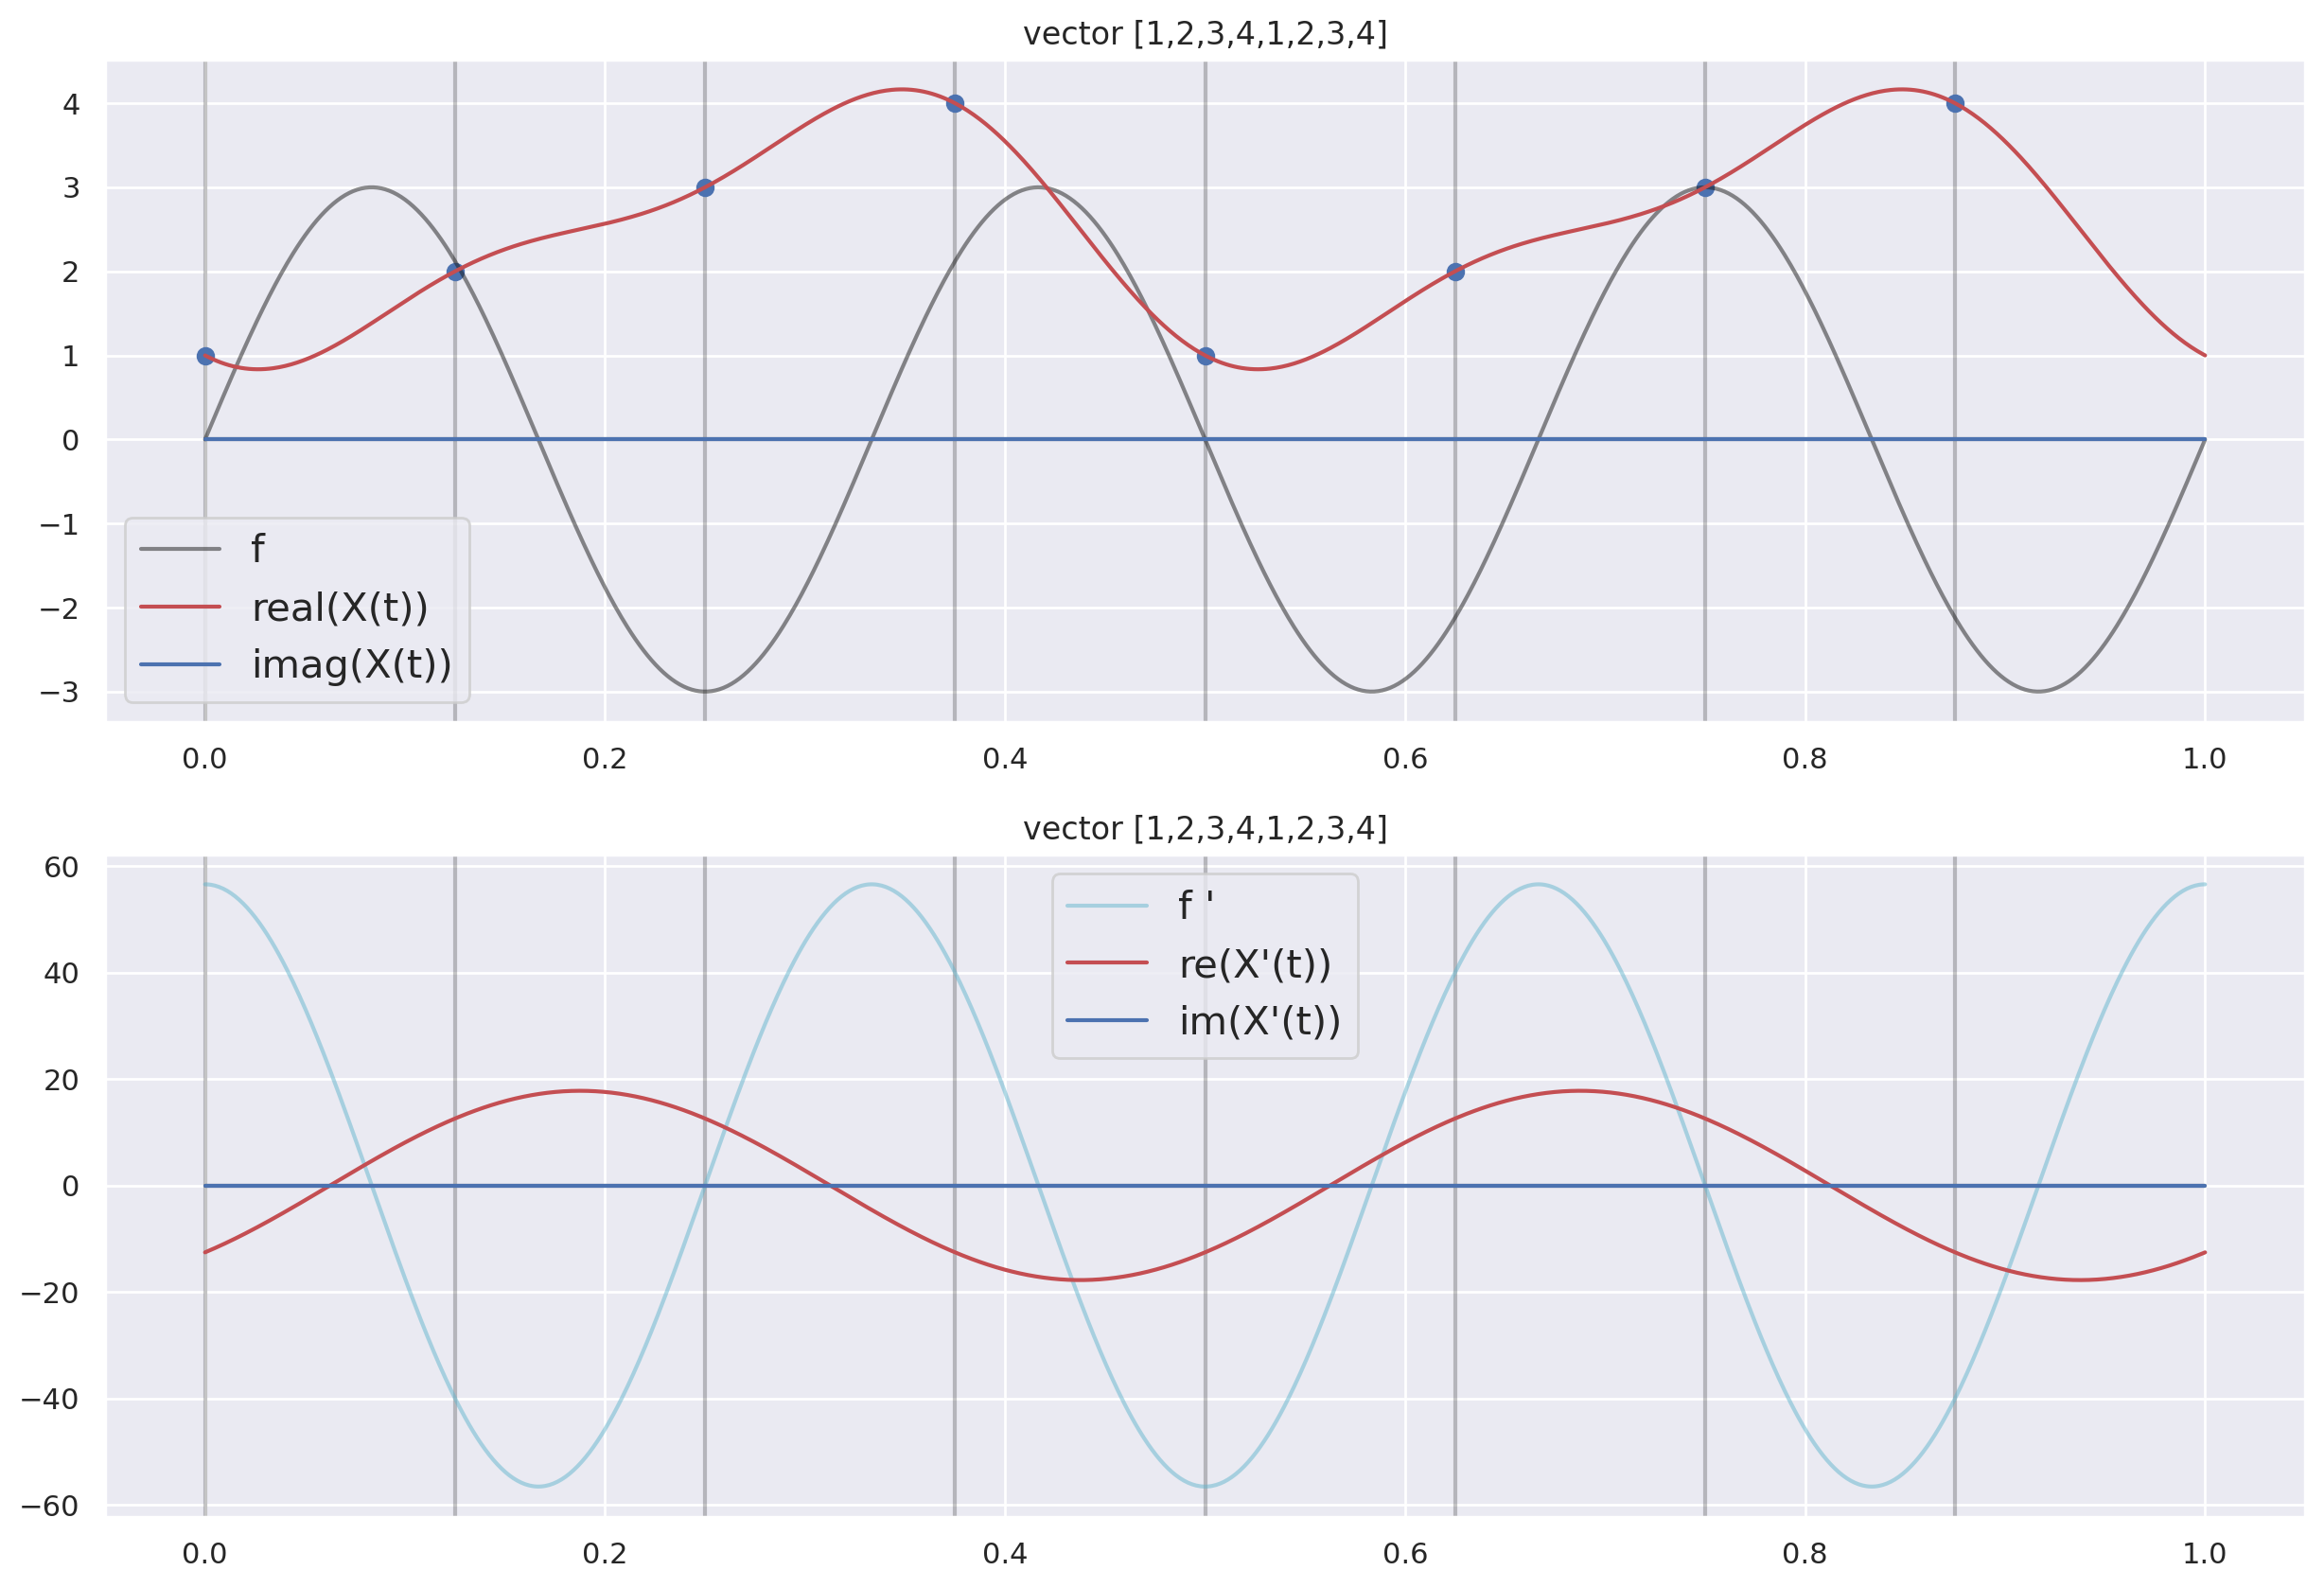

In [24]:
#triginterp.py
import numpy as np
from scipy.fftpack import fft,ifft
from pylab import plot,ion,ioff,draw,title,figure,axvline,legend

for example in [6]:

        #figure(example,figsize=(15,10))
        fig, axes = plt.subplots(2,1,figsize=(15,10))
        
        if example==1:
                mytitle = 'vector [1,0,-1,0]'
                c = 0.
                d = 1.
                L = d-c
                x = np.array([1.,0.,-1.,0.])+0.5
                n = len(x)
                t = L*np.arange(n)/float(n)
        elif example==2:
                mytitle = 'distorted sine'
                n = 8
                c = 0.
                d = 1.
                L = d-c
                t = np.linspace(0.,L,n,endpoint=False)
                print( 'n = ',len(t) )
                r = 3
                def myf(t): return np.exp(r*np.sin(2*pi*t/L))
                def myfprime(t): return exp(r*sin(2*pi*t/L))*r*cos(2*pi*t/L)*(2*pi/L)
                x = myf(t)
                xp = myfprime(t)
        elif example==3:
                mytitle = 'Runge function'
                n = 16
                c = -1.
                d =  1.
                L = d-c
                t = np.linspace(c,d,n,endpoint=False)
                print( 'n =',len(t) )
                def myf(t): return 1/(1+12.*t*t)
                def myfprime(t): return -myf(t)**2 * 24*t
                x = myf(t)
                xp = myfprime(t)

        elif example==4:
                mytitle = 'odd sine'
                n = 8
                c = -1.
                d =  1.
                L = d-c
                t = linspace(c,d,n,endpoint=False)
                print( len(t) )
                def myf(t): return np.sin(3*pi*(t-c)/L)
                def myfprime(t): return 3*pi/L*np.cos(3*pi*(t-c)/L)
                x = myf(t)

        elif example==5:
                mytitle = 'vector [0,1,2,3,4,5,6,7,8,9]'
                c = 0.
                d = 1.
                L = d-c
                x = np.array([0,1,2,3,4,5,6,7,8,9],dtype=float)
                n = len(x)
                t = L*np.arange(n)/float(n)
        elif example==7:
                mytitle = 'sine'
                n = 8
                c = 0.
                d = 1.
                L = d-c
                t = np.linspace(0.,L,n,endpoint=False)
                print( 'n = ',len(t) )
                r = 3
                K = 3
                ph = 0#np.pi/8
                def myf(t): return r*np.sin(2*pi*K*t/L-ph)
                def myfprime(t): return r*np.cos(2*pi*K*t/L-ph)*(2*pi*K/L)
                x = myf(t)
                xp = myfprime(t)
        elif example==6:
                mytitle = 'vector [1,2,3,4,1,2,3,4]'
                c = 0.
                d = 1.
                L = d-c
                x = np.array([1,2,3,4,1,2,3,4],dtype=float)
                n = len(x)
                t = L*np.arange(n)/float(n)


        else:
                print("Which example do you want me to do?")


        y = fft(x)/sqrt(n) # division to get Sauer def of DFT
        a = real(y)
        b = imag(y)
        print( 'y',cprint(y) )
        print( 'a',np.round(a,5) )
        print( 'b',np.round(b,5) )

        tt = np.linspace(c,d,1000)

        p      = np.zeros_like(tt,dtype=complex)  # for interpolant p to f
        pprime = np.zeros_like(tt,dtype=complex)  # for p'

        smart = True #False        
        if not smart:
            kvals = range(0,n)
        else:
            assert n%2==0
            kvals = range(-n//2+1,n//2)
            
        I = complex(0.,1.)
        z = y.copy()
        for k in kvals:  
            term = y[k%n]/np.sqrt(n)*np.exp(I*2.*np.pi*k*(tt-c)/L)
            p += term
            ################ FORM THE SPECTRAL DERIVATIVE HERE
            dterm = y[k%n]/np.sqrt(n)*np.exp(I*2.*np.pi*k*(tt-c)/L) * I*2.*np.pi*k/L
            pprime += dterm
            
        for k in [-n//2,n//2]:
            term = y[k%n]/np.sqrt(n) * np.exp(I*2.*np.pi*k*(tt-c)/L)
            p += term/2
            ### OMIT ADDING 0

        ax = axes[0]
        ax.plot([c,d],[0,0],'k',alpha=0.5)
        for tj in t: ax.axvline(tj,color='k',alpha=0.25)
        ax.plot( t, x, 'o')
        ax.plot(tt,myf(tt)   ,'k',label='f',alpha=0.5)
        ax.plot(tt,np.real(p),'r',label='real(X(t))')
        ax.plot(tt,np.imag(p),'b',label='imag(X(t))')
        ax.legend(fontsize=15)
        ax.set_title(mytitle)

        ax = axes[1]
        for tj in t: ax.axvline(tj,color='k',alpha=0.25)
        ax.plot([c,d],[0,0],'k',alpha=0.5)
        ax.plot(tt,myfprime(tt)   ,'c',label="f '",alpha=0.5)
        ################ PLOT THE SPECTRAL DERIVATIVE HERE ######
        ax.plot(tt,np.real(pprime),'r',label="re(X'(t))")
        ax.plot(tt,np.imag(pprime),'b',label="im(X'(t))")
        
        avgderiverror = np.mean(np.abs(pprime-myfprime(tt)))
        print( 'L1 error in spectral derivative: ',avgderiverror )
        ax.legend(fontsize=15)
        ax.set_title(mytitle)

n =  8


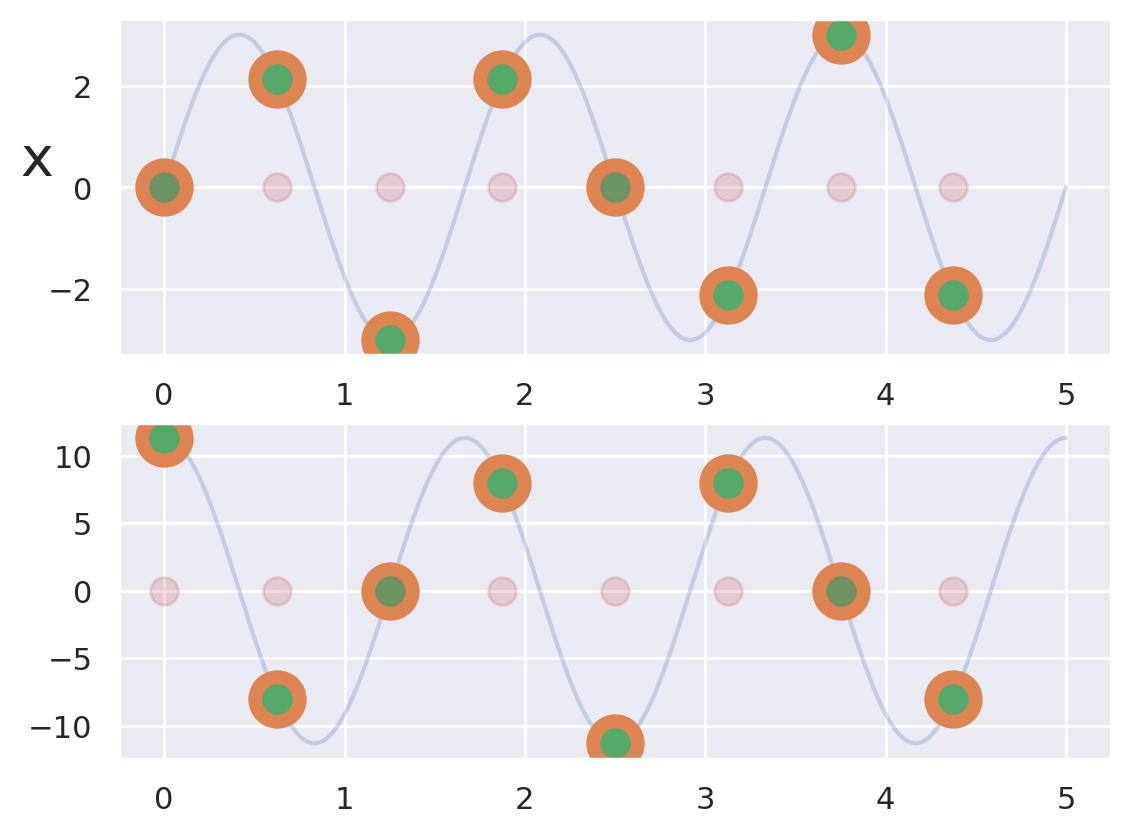

In [34]:
np.set_printoptions(linewidth=300)
mytitle = 'sine'
n = 8
c = 0.
d = 5.
L = d-c
t = np.linspace(0.,L,n,endpoint=False)
print( 'n = ',len(t) )
r = 3
K = 3
ph = 0#np.pi/8
def myf(t): return r*np.sin(2*pi*K*t/L-ph)
def myfprime(t): return r*np.cos(2*pi*K*t/L-ph)*(2*pi*K/L)
x = myf(t)
xp = myfprime(t)
tt = np.linspace(0,L,301)
plt.subplot(2,1,1); plt.plot(tt,myf(tt),alpha=0.25)
plt.subplot(2,1,2); plt.plot(tt,myfprime(tt),alpha=0.25)

plt.subplot(2,1,1); plt.plot(t,x,'o',ms=20)
plt.subplot(2,1,2); plt.plot(t,xp,'o',ms=20)

def cprint(z,n=5): # round doesn't work on complex type
    re = np.round(np.real(z),n)
    im = np.round(np.imag(z),n)
    return re + 1j*im
y = fft(x)
cprint(y)
mult = np.array([0,1,2,3,0,-3,2,1])*2*np.pi*1j/L
yp = mult*y
xp = ifft(yp)
plt.subplot(2,1,1); plt.plot(t,x,'o',ms=10); plt.ylabel('x',rotation=0,fontsize=20)
plt.subplot(2,1,1); plt.plot(t,np.imag(x),'o',ms=10,alpha=0.2)
plt.subplot(2,1,2); plt.plot(t,xp,'o',ms=10)
plt.subplot(2,1,2); plt.plot(t,np.imag(xp),'o',ms=10,alpha=0.2);
